In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_html("https://en.wikipedia.org/wiki/List_of_Diners,_Drive-Ins_and_Dives_episodes")

In [3]:
all_seasons = pd.DataFrame()

for x in range(1, len(df)):
   #  print(x)
    season = df[x]
    season.columns = ['Total', 'Episode', 'Title', 'Restaurant', 'Location',
       'Original Air Date']
    season['season_num'] = x

    all_seasons = pd.concat([all_seasons, season], ignore_index=True)

In [4]:
all_seasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1805 entries, 0 to 1804
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Total              1796 non-null   float64
 1   Episode            1805 non-null   object 
 2   Title              1805 non-null   object 
 3   Restaurant         1804 non-null   object 
 4   Location           1804 non-null   object 
 5   Original Air Date  1804 non-null   object 
 6   season_num         1805 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 98.8+ KB


In [18]:
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC', 'D.C.': 'DC', 'Puerto Rico': 'PR', 'U.S. Virgin Islands': 'VI',
    'American Samoa': 'AS', 'Guam': 'GU'
}

In [19]:
all_seasons['Episode'] = pd.to_numeric(all_seasons['Episode'], errors='coerce')
all_seasons['city'] = all_seasons['Location'].str.split(',').str[0]
all_seasons['state'] = all_seasons['Location'].str.split(',').str[-1].str.strip()
all_seasons['year'] = all_seasons['Original Air Date'].str.split(' ').str[-1]
all_seasons['year'] = all_seasons['year'].astype('Int64')
all_seasons['state_abbrev'] = all_seasons['state'].map(state_abbrev)

In [20]:
print('Total restaurants visited:', len(all_seasons))
print('Total epsidodes:', max(all_seasons['Total']))
print('Longest Season:', max(all_seasons['Episode']))

Total restaurants visited: 1805
Total epsidodes: 566.0
Longest Season: 41.0


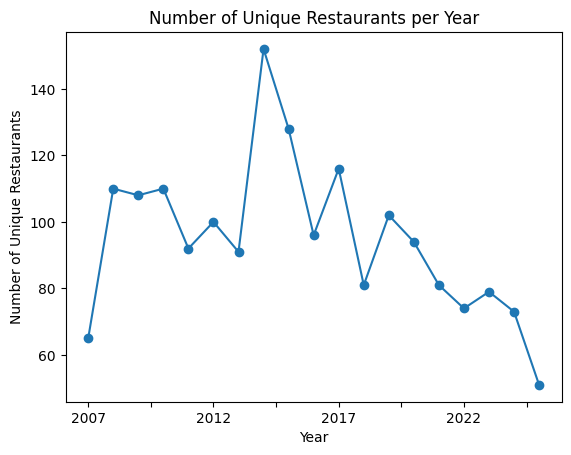

In [23]:
# Group by year and count unique restaurants, then plot
restaurants_per_year = all_seasons.groupby('year')['Restaurant'].nunique()
restaurants_per_year.index = restaurants_per_year.index.astype(str)

restaurants_per_year.plot(kind='line', marker='o')
plt.title('Number of Unique Restaurants per Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Restaurants')
plt.show()

In [27]:
# Mapping from state name to 2-character abbreviation

# Count unique restaurants by state
restaurants_by_state = all_seasons.groupby('state_abbrev')['Restaurant'].nunique().reset_index()
restaurants_by_state.columns = ['state_abbrev', 'num_restaurants']

# Plot a choropleth map of the US
fig = px.choropleth(
    restaurants_by_state,
    locations='state_abbrev',
    locationmode='USA-states',
    color='num_restaurants',
    color_continuous_scale='Viridis',
    scope='usa',
    labels={'num_restaurants': 'Number of Restaurants'},
    title='Number of Unique Restaurants by State (Diners, Drive-Ins and Dives)'
)

fig.show()